# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

query_url = f"{url}?units=metric&appid={weather_api_key}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Get the current date and time:
current_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | abepura
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | vicam
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | minas de marcona
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | bikenibeu village
Processing Record 14 of Set 1 | bloomington
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | happy valley-goose bay
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | akureyri
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | genoa
Processing Record 22 of Set 1 | lorengau
Processing 

In [4]:
len(city_data)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,1.77,86,91,3.29,IS,2023-11-14 00:10:57
1,abepura,-2.6333,140.5833,28.45,79,20,1.54,ID,2023-11-14 00:10:57
2,adamstown,-25.0660,-130.1015,22.83,84,94,7.36,PN,2023-11-14 00:10:57
3,georgetown,5.4112,100.3354,26.68,89,20,0.00,MY,2023-11-14 00:08:52
4,yellowknife,62.4560,-114.3525,-6.71,86,100,2.06,CA,2023-11-14 00:10:57


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,1.77,86,91,3.29,IS,2023-11-14 00:10:57
1,abepura,-2.6333,140.5833,28.45,79,20,1.54,ID,2023-11-14 00:10:57
2,adamstown,-25.0660,-130.1015,22.83,84,94,7.36,PN,2023-11-14 00:10:57
3,georgetown,5.4112,100.3354,26.68,89,20,0.00,MY,2023-11-14 00:08:52
4,yellowknife,62.4560,-114.3525,-6.71,86,100,2.06,CA,2023-11-14 00:10:57


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

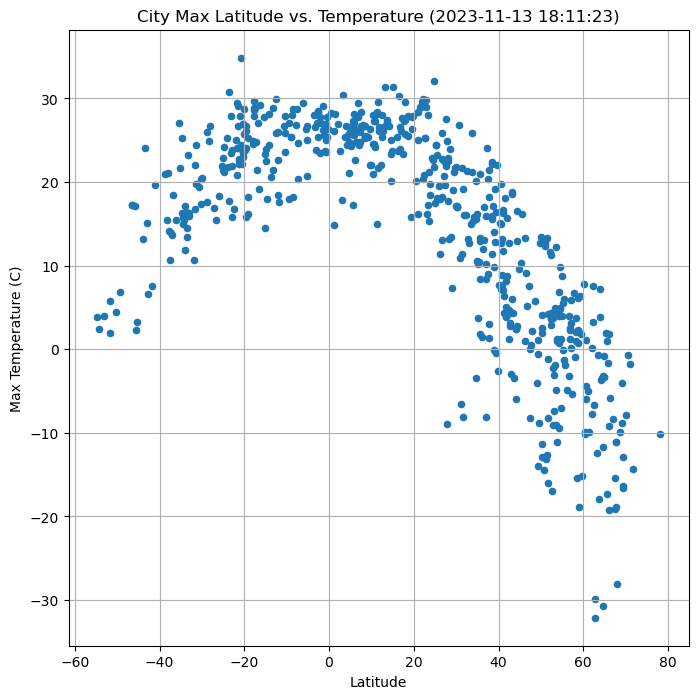

In [12]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot(kind="scatter",
                  x="Lat",
                  y="Max Temp",
                  grid=True,figsize=(8,8),
                title=f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("./output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

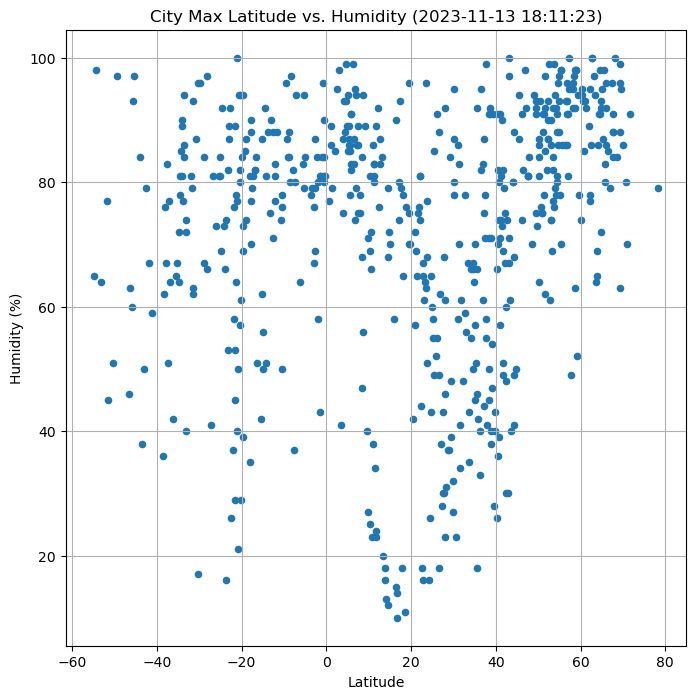

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter",x="Lat",y="Humidity",grid=True,figsize=(8,8),
                    title=f"City Max Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("./output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

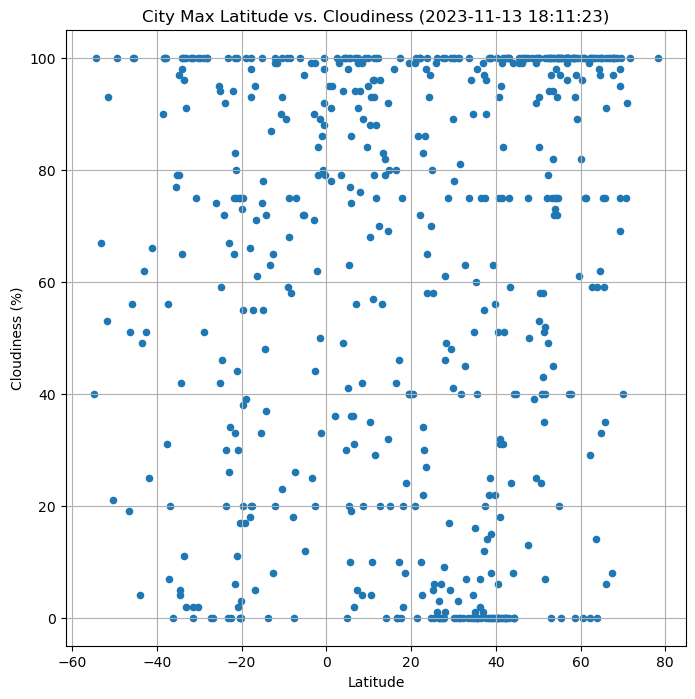

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,figsize=(8,8),
                    title=f"City Max Latitude vs. Cloudiness ({current_date})")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("./output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

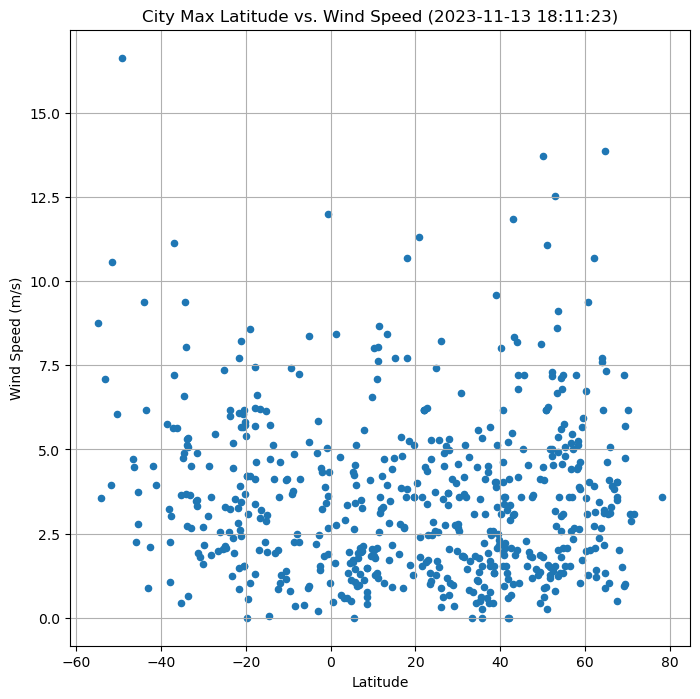

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,figsize=(8,8),
                    title=f"City Max Latitude vs. Wind Speed ({current_date})")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("./output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots

def lin_reg_fcn(x_values, y_values, x_label, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),max(y_values)),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,1.77,86,91,3.29,IS,2023-11-14 00:10:57
3,georgetown,5.4112,100.3354,26.68,89,20,0.00,MY,2023-11-14 00:08:52
4,yellowknife,62.4560,-114.3525,-6.71,86,100,2.06,CA,2023-11-14 00:10:57
5,aasiaat,68.7098,-52.8699,-9.93,84,100,1.50,GL,2023-11-14 00:10:57
6,vicam,27.6333,-110.2833,27.51,30,0,3.71,MX,2023-11-14 00:10:58


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,abepura,-2.6333,140.5833,28.45,79,20,1.54,ID,2023-11-14 00:10:57
2,adamstown,-25.0660,-130.1015,22.83,84,94,7.36,PN,2023-11-14 00:10:57
7,luderitz,-26.6481,15.1594,15.40,81,0,1.99,NaN,2023-11-14 00:07:30
8,minas de marcona,-15.2119,-75.1103,14.56,87,74,6.15,PE,2023-11-14 00:10:58
14,grytviken,-54.2811,-36.5092,2.38,98,100,3.57,GS,2023-11-14 00:10:59


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7204762195847848


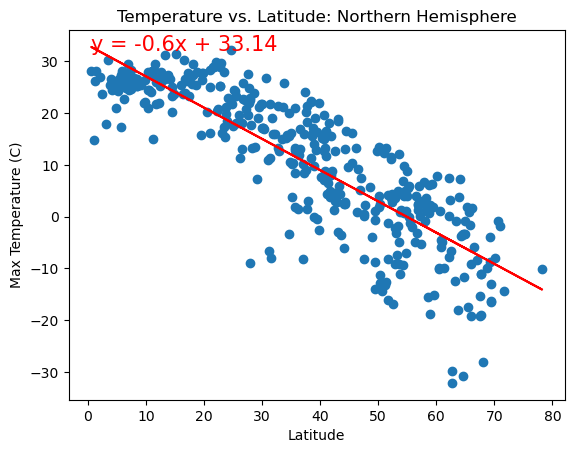

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.title("Temperature vs. Latitude: Northern Hemisphere")
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
x_range = (-5,85)
y_range = (-25,45)
lin_reg_fcn(x_values, y_values, x_label, y_label)

The r-squared is: 0.5319782574041861


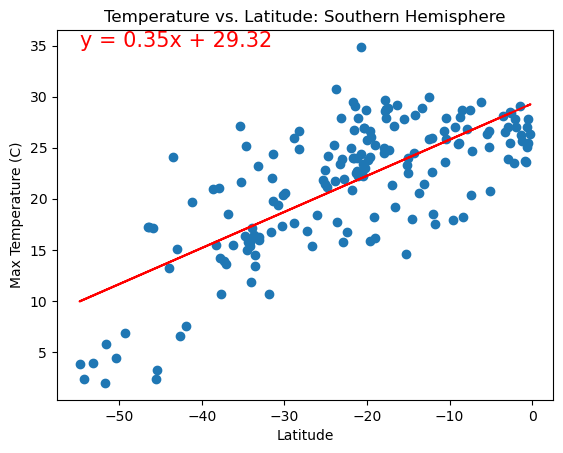

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.title("Temperature vs. Latitude: Southern Hemisphere")
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (-50,5)
lin_reg_fcn(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** Temperature and latitude are positively correlated based on the r-squared values obtained and on common sense. We know the weather gets warmer the closer to the equater(0 deg latitutde) you are and cooler the farther away you are.  R-squared values of 0.4 (southern hemisphere) and 0.7(northern hemisphere) as we see here in the temperature vs latitude plots with linear regression analyis, are both postive correlations and hosw a linear relationship between the data.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09290958808056006


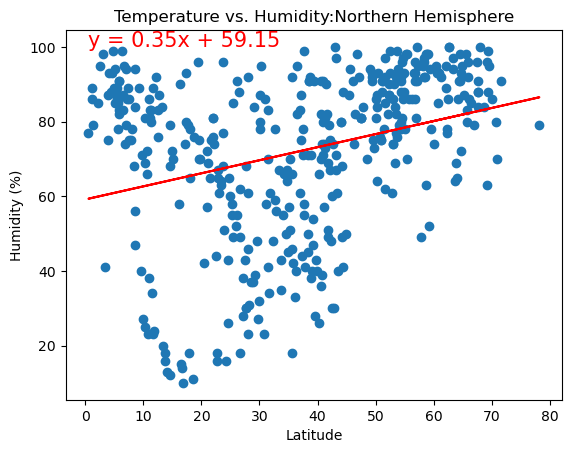

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.title("Temperature vs. Humidity:Northern Hemisphere")
x_label = 'Latitude'
y_label = 'Humidity (%)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (50,20)
lin_reg_fcn(x_values, y_values, x_label, y_label)

The r-squared is: 0.025434149345270298


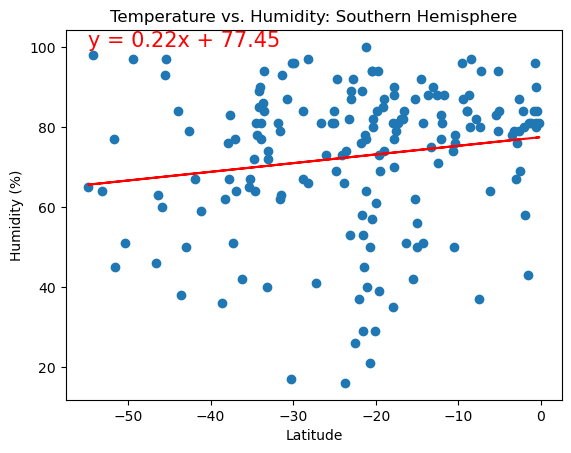

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.title("Temperature vs. Humidity: Southern Hemisphere")
x_label = 'Latitude'
y_label = 'Humidity (%)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (-50,20)
lin_reg_fcn(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** There appears a less direct correlation between latitude and humidity. In both hemispheres the r-square number (southern=0.002, northern=0.05) does not indicate a strong relationship. These numbers do indicate a stronger correlation in the northern hemisphere. It might be better to look at humidity data using a different type of analysis as the data is more complicated and both tropical regions and regions closer to large water bodies tend to be higher in humidity indicating that latitude in only a small part of what determines humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.025847552188780733


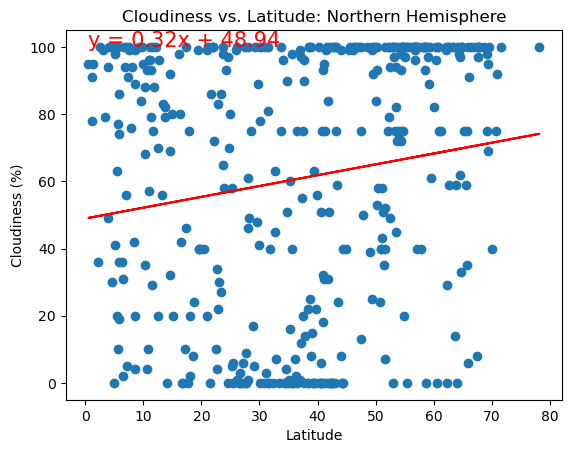

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.title("Cloudiness vs. Latitude: Northern Hemisphere")
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (50,20)
lin_reg_fcn(x_values, y_values, x_label, y_label)

The r-squared is: 0.003597069082883532


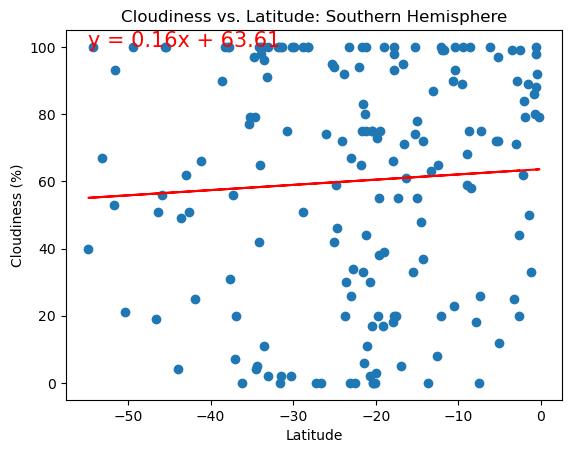

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.title("Cloudiness vs. Latitude: Southern Hemisphere")
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (-50,25)
lin_reg_fcn(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** The same lack of correlation as humitdity and latitidue can be said for cloudiness and latitude. This is not a linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.020561703835667022


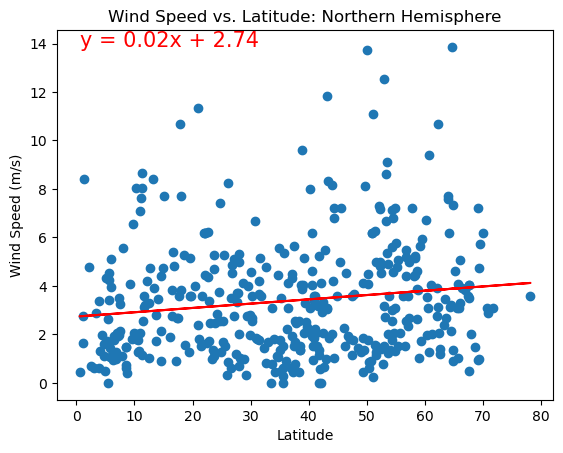

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.title("Wind Speed vs. Latitude: Northern Hemisphere")
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (0,10)
lin_reg_fcn(x_values, y_values, x_label, y_label)

The r-squared is: 0.06440200775066869


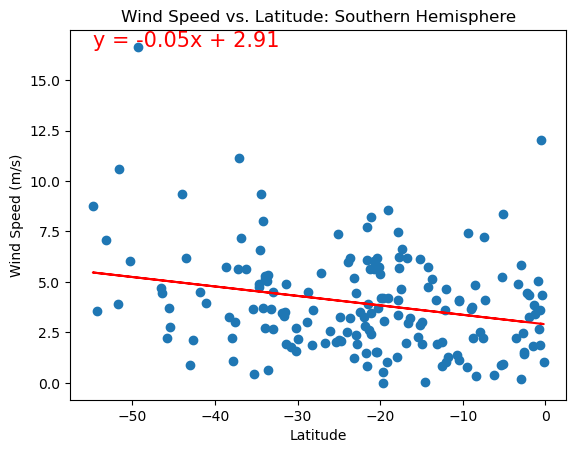

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.title("Wind Speed vs. Latitude: Southern Hemisphere")
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
x_range = (-5,85)
y_range = (-25,45)
ann_pos = (-50,5)
lin_reg_fcn(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** There also appears to be a low correlation between wind speed and latitidue.  This is also not a linear relationship that is well describe by linear regression. 